Import needed library for learning model

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Build dataframe for training set

In [2]:
dataframe = pd.read_csv('all_car_adverts.csv'  )
dataframe.head()

,Customer_Id,make,model,variant,car_price,car_badges,car_title,car_sub_title,car_attention_grabber,car_specs,...,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
0,0,AC,Cobra,NaN,89995,NaN,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,"2001 (X reg), Convertible, 14,400 miles, 4.9L,...",...,5.0,0,0,0,0,0,0,0,0,0
1,1,AC,Cobra,NaN,92500,'',AC Cobra,378 - MkIV,PHYSICAL CAR!,"2019 (T reg), Convertible, 650 miles, Manual, ...",...,NaN,0,0,0,0,0,0,0,0,0
2,2,AC,Cobra,NaN,109995,'',AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,"2000 (X reg), Convertible, 21,600 miles, 3.5L,...",...,3.0,0,0,0,0,0,0,0,0,0
3,3,AC,Cobra,NaN,124950,'',AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,"1989 (F reg), Convertible, 2,750 miles, Manual...",...,NaN,0,0,0,0,0,0,0,0,0
4,4,AC,Cobra,NaN,124950,'',AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,"1989 (E reg), Convertible, 15,142 miles, 5.0L,...",...,NaN,0,0,0,0,0,0,0,0,0


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [3]:
dataframe.columns

Index(['Customer_Id', 'make', 'model', 'variant', 'car_price', 'car_badges',
       'car_title', 'car_sub_title', 'car_attention_grabber', 'car_specs',
       'car_seller', 'car_seller_rating', 'car_seller_location', 'year', 'reg',
       'body_type', 'miles', 'engine_vol', 'engine_size', 'engine_size_unit',
       'transmission', 'feul_type', 'num_owner', 'ulez', 'full_service',
       'part_service', 'part_warranty', 'full_dealership',
       'first_year_road_tax', 'brand_new', 'finance_available', 'discounted'],
      dtype='object')

we can drop first column since it does not affect the price.

In [3]:
dataframe.drop('Customer_Id', axis=1, inplace=True)

In [4]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 818456 rows and 32 columns


## Describe some basic statistical values

In [5]:
dataframe.describe()

,Customer_Id,car_price,car_seller_rating,miles,engine_vol,engine_size,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
count,818456.000000,8.184560e+05,644191.000000,763703.000000,803010.000000,814247.000000,442596.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000
mean,409227.500000,2.011859e+04,4.649465,48735.854328,1.860284,170.134123,2.097290,0.815449,0.108105,0.013059,0.063693,0.035079,0.063693,0.066233,0.716983,0.045162
std,236268.040297,2.224110e+04,0.433626,36520.141907,0.752763,92.141443,1.265622,0.387933,0.310513,0.113526,0.244206,0.183981,0.244206,0.248690,0.450465,0.207659
min,0.000000,3.000000e+02,1.000000,2.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204613.750000,8.990000e+03,4.600000,19441.000000,1.400000,115.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,409227.500000,1.500000e+04,4.700000,40267.000000,1.600000,148.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,613841.250000,2.450000e+04,4.900000,71215.500000,2.000000,190.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,818455.000000,3.199830e+06,5.000000,999999.000000,8.300000,2460.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Describe summary of data frame 

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_Id            818456 non-null  int64  
 1   make                   818456 non-null  object 
 2   model                  818153 non-null  object 
 3   variant                816207 non-null  object 
 4   car_price              818456 non-null  int64  
 5   car_badges             801459 non-null  object 
 6   car_title              818456 non-null  object 
 7   car_sub_title          817909 non-null  object 
 8   car_attention_grabber  738163 non-null  object 
 9   car_specs              818456 non-null  object 
 10  car_seller             818348 non-null  object 
 11  car_seller_rating      644191 non-null  float64
 12  car_seller_location    816256 non-null  object 
 13  year                   818456 non-null  object 
 14  reg                    747436 non-nu

## Handling outliers

In [7]:
train_outliers=dataframe.select_dtypes(include=['int', 'float'])
train_outliers.head()


,Customer_Id,car_price,car_seller_rating,miles,engine_vol,engine_size,num_owner,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
0,0,89995,NaN,14400.0,4.9,225.0,5.0,0,0,0,0,0,0,0,0,0
1,1,92500,5.0,650.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
2,2,109995,4.8,21600.0,3.5,NaN,3.0,0,0,0,0,0,0,0,0,0
3,3,124950,5.0,2750.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
4,4,124950,5.0,15142.0,5.0,NaN,NaN,0,0,0,0,0,0,0,0,0


In [42]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = train_outliers[(train_outliers[col] < range_low) | (train_outliers[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in Customer_Id is : 0
NUmber of outliers in car_price is : 50585
NUmber of outliers in car_seller_rating is : 50793
NUmber of outliers in miles is : 9350
NUmber of outliers in engine_vol is : 96139
NUmber of outliers in engine_size is : 66498
NUmber of outliers in num_owner is : 3856
NUmber of outliers in ulez is : 151047
NUmber of outliers in full_service is : 88479
NUmber of outliers in part_service is : 10688
NUmber of outliers in part_warranty is : 52130
NUmber of outliers in full_dealership is : 28711
NUmber of outliers in first_year_road_tax is : 52130
NUmber of outliers in brand_new is : 54209
NUmber of outliers in finance_available is : 0
NUmber of outliers in discounted is : 36963


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

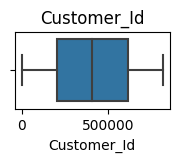

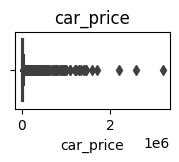

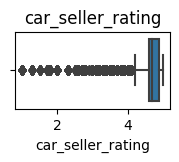

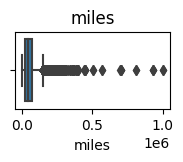

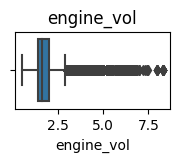

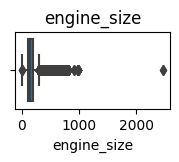

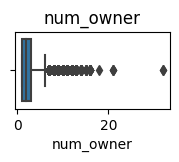

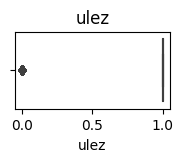

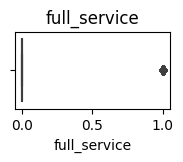

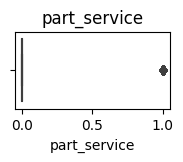

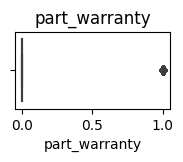

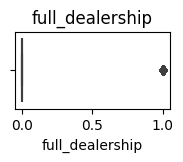

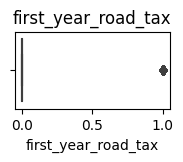

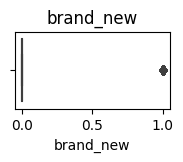

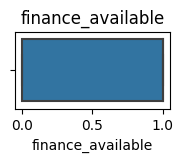

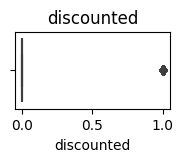

In [8]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=train_outliers[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [9]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    train_outliers = train_outliers[(train_outliers[col] >= range_low) & (train_outliers[col] <= range_high)]

    outliers = train_outliers[(train_outliers[col] < range_low) | (train_outliers[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in Customer_Id is : 0
NUmber of outliers in car_price is : 0
NUmber of outliers in car_seller_rating is : 0
NUmber of outliers in miles is : 0
NUmber of outliers in engine_vol is : 0
NUmber of outliers in engine_size is : 0
NUmber of outliers in num_owner is : 0
NUmber of outliers in ulez is : 0
NUmber of outliers in full_service is : 0
NUmber of outliers in part_service is : 0
NUmber of outliers in part_warranty is : 0
NUmber of outliers in full_dealership is : 0
NUmber of outliers in first_year_road_tax is : 0
NUmber of outliers in brand_new is : 0
NUmber of outliers in finance_available is : 0
NUmber of outliers in discounted is : 0


## Checking Data Imbalance *

In [45]:
train_data_imbalance=dataframe.select_dtypes(include=['object'])
train_data_imbalance.head()


,make,model,variant,car_badges,car_title,car_sub_title,car_attention_grabber,car_specs,car_seller,car_seller_location,year,reg,body_type,engine_size_unit,transmission,feul_type
0,AC,Cobra,NaN,NaN,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,"2001 (X reg), Convertible, 14,400 miles, 4.9L,...",Private seller,watford,2001,X reg,convertible,bhp,manual,petrol
1,AC,Cobra,NaN,'',AC Cobra,378 - MkIV,PHYSICAL CAR!,"2019 (T reg), Convertible, 650 miles, Manual, ...",Boss Motor Company Limited,chesham,2019,T reg,convertible,NaN,manual,petrol
2,AC,Cobra,NaN,'',AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,"2000 (X reg), Convertible, 21,600 miles, 3.5L,...",PREMIER GT LIMITED,pulborough,2000,X reg,convertible,NaN,manual,petrol
3,AC,Cobra,NaN,'',AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,"1989 (F reg), Convertible, 2,750 miles, Manual...",TOP 555 LIMITED,oakham,1989,F reg,convertible,NaN,manual,petrol
4,AC,Cobra,NaN,'',AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,"1989 (E reg), Convertible, 15,142 miles, 5.0L,...",TOP 555 LIMITED,oakham,1989,E reg,convertible,NaN,manual,petrol


In [46]:
train_data_imbalance.drop(['car_attention_grabber' ,'car_sub_title' ,'car_seller' ,'car_seller_location' ,'reg'], axis=1, inplace=True)

In [47]:
k=0
plt.figure(figsize=(20,25))
for col in train_data_imbalance:    
    k=k+1
    plt.subplot(4, 3,k)    
    train_data_imbalance[col].value_counts().plot(kind='bar')
    plt.title(col)

KeyboardInterrupt: 

## Handle missing value

In [10]:
dataframe.columns[dataframe.isna().any()].tolist()

['model',
 'variant',
 'car_badges',
 'car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'reg',
 'body_type',
 'miles',
 'engine_vol',
 'engine_size',
 'engine_size_unit',
 'transmission',
 'feul_type',
 'num_owner']

In [11]:
train_missings = dataframe.filter(['model',
 'variant',
 'car_badges',
 'car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'reg',
 'body_type',
 'miles',
 'engine_vol',
 'engine_size',
 'engine_size_unit',
 'transmission',
 'feul_type',
 'num_owner'] ,axis=1)

In [12]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
model                     0.037021
variant                   0.274786
car_badges                2.076715
car_sub_title             0.066833
car_attention_grabber     9.810301
car_seller                0.013196
car_seller_rating        21.291920
car_seller_location       0.268799
reg                       8.677314
body_type                 0.086993
miles                     6.689792
engine_vol                1.887212
engine_size               0.514261
engine_size_unit          0.514261
transmission              0.026025
feul_type                 0.027124
num_owner                45.923055
dtype: float64


Because the missing-value rate of 'num_owner' and 'car_seller_rating' is high so we can drop these 2 columns to reduce errors

In [13]:
dataframe.drop(['car_seller_rating' ,'num_owner'] ,axis=1 ,inplace=True)

# Encoding labels

In [14]:

encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   make                   818456 non-null  object
 1   model                  818153 non-null  object
 2   variant                816207 non-null  object
 3   car_badges             801459 non-null  object
 4   car_title              818456 non-null  object
 5   car_sub_title          817909 non-null  object
 6   car_attention_grabber  738163 non-null  object
 7   car_specs              818456 non-null  object
 8   car_seller             818348 non-null  object
 9   car_seller_location    816256 non-null  object
 10  year                   818456 non-null  object
 11  reg                    747436 non-null  object
 12  body_type              817744 non-null  object
 13  engine_size_unit       814247 non-null  object
 14  transmission           818243 non-null  object
 15  

In [15]:
encoding_col = dataframe.select_dtypes(include='object')
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col])
    dataframe[col] = le.transform(encoding_col[col])
dataframe.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_Id            818456 non-null  int64  
 1   make                   818456 non-null  int32  
 2   model                  818456 non-null  int32  
 3   variant                818456 non-null  int32  
 4   car_price              818456 non-null  int64  
 5   car_badges             818456 non-null  int32  
 6   car_title              818456 non-null  int32  
 7   car_sub_title          818456 non-null  int32  
 8   car_attention_grabber  818456 non-null  int32  
 9   car_specs              818456 non-null  int32  
 10  car_seller             818456 non-null  int32  
 11  car_seller_location    818456 non-null  int32  
 12  year                   818456 non-null  int32  
 13  reg                    818456 non-null  int32  
 14  body_type              818456 non-nu

# Splitting data into train and test

In [16]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

0     89995
1     92500
2    109995
3    124950
4    124950
Name: car_price, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , train_size=0.7, random_state=100 )
print(X_train.shape)
print(y_train.shape)


(572919, 29)
(572919,)


In [18]:
X_train.columns

Index(['Customer_Id', 'make', 'model', 'variant', 'car_badges', 'car_title',
       'car_sub_title', 'car_attention_grabber', 'car_specs', 'car_seller',
       'car_seller_location', 'year', 'reg', 'body_type', 'miles',
       'engine_vol', 'engine_size', 'engine_size_unit', 'transmission',
       'feul_type', 'ulez', 'full_service', 'part_service', 'part_warranty',
       'full_dealership', 'first_year_road_tax', 'brand_new',
       'finance_available', 'discounted'],
      dtype='object')

In [20]:
num_val =['make', 'model', 'variant', 'car_badges', 'car_title', 'car_sub_title',
       'car_attention_grabber', 'car_specs', 'car_seller', 'car_seller_location', 
       'year', 'reg', 'body_type', 'miles', 'engine_vol', 'engine_size', 
       'engine_size_unit', 'transmission', 'feul_type', 'ulez']
scaler = MinMaxScaler()
X_train[num_val] = scaler.fit_transform(X_train[num_val])
X_train.head()


,Customer_Id,make,model,variant,car_badges,car_title,car_sub_title,car_attention_grabber,car_specs,car_seller,...,feul_type,ulez,full_service,part_service,part_warranty,full_dealership,first_year_road_tax,brand_new,finance_available,discounted
530087,530087,0.666667,0.523265,0.611986,0.009284,0.652637,0.017264,0.596316,0.924644,0.951112,...,0.666667,1.0,0,0,0,1,0,0,1,0
331093,331093,0.488372,0.353166,0.503376,0.008331,0.436359,0.726981,0.999690,0.794166,0.608526,...,0.111111,1.0,0,0,0,0,0,0,1,0
537394,537394,0.666667,0.604119,0.190208,0.009284,0.658215,0.894789,0.794897,0.520206,0.897763,...,0.111111,1.0,0,0,0,0,0,0,1,0
736583,736583,0.961240,0.618612,0.384637,0.015711,0.905680,0.159402,1.000000,0.528221,0.373257,...,0.666667,1.0,0,0,0,0,0,0,1,0
447133,447133,0.612403,0.225782,0.188239,0.015711,0.568458,0.614376,0.111836,0.269914,0.640126,...,0.111111,1.0,0,0,0,0,0,0,1,0


# Training the model

## Random forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_train)
rfr = RandomForestRegressor()
rfr.fit(X_imputed, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())